In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [53]:
traindata = pd.read_csv('Train.csv')
traindata = traindata.drop(['Unnamed: 0','Name'],axis=1)
traindata = pd.get_dummies(traindata,columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
traindata = traindata.dropna()
traindata.Mileage = traindata.Mileage.str.replace(' kmpl','').astype(float)
traindata.Engine = traindata.Engine.str.replace(' CC','').astype(float)
traindata = traindata[traindata.Power != 'null bhp']
traindata.Power = traindata.Power.str.replace(' bhp','').astype(float)

traindata

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2017,16500,23.84,1199.0,84.00,5.0,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,2007,200000,17.20,1396.0,53.50,5.0,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2013,64000,21.02,1248.0,88.76,5.0,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,150000,11.00,2993.0,235.00,5.0,18.75,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3746,2012,85000,11.79,2179.0,120.00,7.0,6.25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3747,2007,55100,18.90,998.0,67.10,5.0,1.45,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3748,2014,77500,20.45,1461.0,83.80,5.0,6.60,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Z-Score Standardization of Data

In [54]:
notHotEncoded = traindata.select_dtypes(include=['int64','float64']).columns
notHotEncoded = notHotEncoded.drop('Price')
for i in notHotEncoded:
    traindata[i] = (traindata[i] - traindata[i].mean())/traindata[i].std()
    
traindata

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.127269,-1.020251,1.316366,-0.711259,-0.546072,-0.351374,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,1.127269,-0.255071,0.068488,-0.223363,-0.251070,2.121461,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.176632,-0.561495,-0.745549,-0.049114,-0.186170,-0.351374,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,-2.041520,3.530111,-0.232403,-0.384335,-1.108418,-0.351374,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,-0.140247,0.157636,0.658606,-0.629943,-0.458309,-0.351374,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,-1.407762,2.290231,-1.678542,2.265903,2.238006,-0.351374,18.75,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3746,-0.457125,0.678385,-1.494276,0.915061,0.117682,2.121461,6.25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3747,-2.041520,-0.063063,0.164119,-1.044820,-0.857667,-0.351374,1.45,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3748,0.176632,0.492403,0.525654,-0.276467,-0.549759,-0.351374,6.60,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Checking for the correlation of features to find redundant features and features with low correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.423923,0.293728,-0.074937,0.018804,0.005696,0.306133
Kilometers_Driven,-0.423923,1.000000,-0.132611,0.153966,0.005265,0.193156,-0.156744
Mileage,0.293728,-0.132611,1.000000,-0.631421,-0.531372,-0.317068,-0.334169
Engine,-0.074937,0.153966,-0.631421,1.000000,0.864727,0.387373,0.649705
Power,0.018804,0.005265,-0.531372,0.864727,1.000000,0.091839,0.761909
Seats,0.005696,0.193156,-0.317068,0.387373,0.091839,1.000000,0.051917
Price,0.306133,-0.156744,-0.334169,0.649705,0.761909,0.051917,1.000000


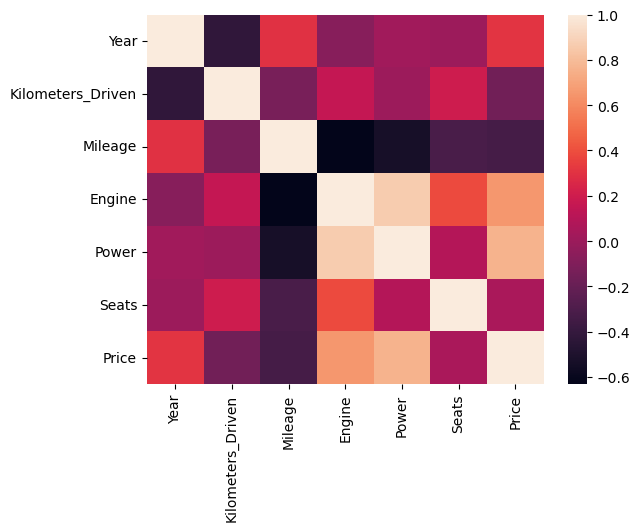

In [55]:
traincorr = traindata.select_dtypes(include=['float64', 'Int64']).corr()
sns.heatmap(traincorr)
traindata.drop(['Seats', 'Kilometers_Driven', 'Engine'], axis=1)
traincorr

# Parsing the Test.csv file and applying standardization

In [56]:
testdata = pd.read_csv('Test.csv')
testdata = testdata.drop(['Unnamed: 0','Name'],axis=1)
testdata = pd.get_dummies(testdata,columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
testdata = testdata.dropna()
testdata.Mileage = testdata.Mileage.str.replace(' kmpl','').astype(float)
testdata.Engine = testdata.Engine.str.replace(' CC','').astype(float)
testdata = testdata[testdata.Power != 'null bhp']
testdata.Power = testdata.Power.str.replace(' bhp','').astype(float)
testnotHotEncoded = testdata.select_dtypes(include=['int64','float64']).columns
testnotHotEncoded = testnotHotEncoded.drop('Price')
for i in notHotEncoded:
    testdata[i] = (testdata[i] - testdata[i].mean())/testdata[i].std()
testdata = testdata.drop(['Seats','Kilometers_Driven','Engine'],axis=1)
testdata

,Year,Mileage,Power,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-0.166278,1.236734,-0.801440,6.95,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
1,-0.483790,-0.287738,-0.704491,2.90,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,1.103767,0.102244,-0.645925,6.28,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
3,-0.801301,-1.103152,1.988335,13.80,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,-0.166278,0.518223,-0.704491,2.75,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,-0.166278,1.071287,0.231370,6.80,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1246,-2.706370,-0.323190,-0.623370,0.80,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True
1247,1.103767,-0.226286,-0.217764,8.27,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1248,-0.483790,0.215693,0.233744,6.00,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [57]:
Xtrain = traindata.drop('Price',axis=1).to_numpy()
Ytrain = traindata.Price.to_numpy()

Xtest = testdata.drop('Price',axis=1).to_numpy()
Ytest = testdata.Price.to_numpy()


In [58]:
#a is regularization constant

def cost(x,y,w,b,a):
    m,n = x.shape
    f = (np.dot(x,w)+b)
    cost = 0.5*(np.mean(f-y)**2+a*np.sum(w**2)/m)
    return cost

def gradient(x,y,w,b,a):
    m,n = x.shape
    dwj = np.zeros(n)
    dbj = 0
    error = (x.dot(w)+b)-y
    dbj += np.sum(error)
    dwj = np.dot(x.T,error)
    dwj += a*w
    return dbj/m,dwj/m
    
    

# Implementing Gradient descent

In [59]:
def gradinet_descent(x,y,winit,binit,alpha,gradientfunc,iterations,a=0):
    costs = []
    w = winit
    b = binit
    for i in range(iterations):
        dbj,dwj = gradientfunc(x,y,w,b,a)
        w -= alpha*dwj
        b -= alpha*dbj
        c = cost(x,y,w,b,a)
        costs.append(c)
        
    return w,b,costs

In [60]:
winit = np.zeros_like(Xtrain[0])
binit = 0
costs = []
w,b,costs = gradinet_descent(Xtrain,Ytrain,winit,binit,0.01,gradient,2000,10)
print(f"w = {w} b = {b}")

w = [3.0995316952379297 -0.9510471231194323 -0.6056947689549913
 1.6623343127473176 6.182664915171141 -0.9196250188008323
 1.8266472848304585 1.3592116217499655 2.3694294381264114
 -0.24120035425100042 2.7664530836955477 1.1362983244039397
 0.5941762982765705 -0.6968731285347237 -0.4827096105245864
 0.8649064085857227 0.0 -1.7444353088876736 -1.3419206958272631
 0.014042195778738598 0.06675338549412049 0.2627902338040357] b = 10.35993183111915


In [52]:
def predictedvalues(xt,w,b):
    m = xt.shape[0]
    ypredicted = np.zeros(m)
    for i in range(m):
        ypredicted[i] = np.dot(xt[i],w)+b

        #Since our y values are never negative, I put a minimum cap of zero on the predicted cost
        if ypredicted[i] < 0:
            ypredicted[i] = 0
    return ypredicted

yp = predictedvalues(Xtest,w,b)
meansquare = ((yp-Ytest)**2).mean()
rootmeansquare = np.sqrt(meansquare)
rootmeansquare

print(f"Mean Square Error: {meansquare}\nRoot Mean Square Error: {rootmeansquare}")

ValueError: shapes (19,) and (22,) not aligned: 19 (dim 0) != 22 (dim 0)

In [ ]:
def rsquared(yt,ypredicted):
    rsumq = np.sum((yt-ypredicted)**2)
    tsumq = np.sum((yt-yt.mean())**2)
    return 1-rsumq/tsumq
print(f"R-Squared: {rsquared(Ytest,yp)}")
print(f"Training data R-Squared: {rsquared(Ytrain,predictedvalues(Xtrain,w,b))}")

NameError: name 'yp' is not defined